# Project 1 - Classification
## CS (STAT) 5525 Due - April 1, 2021
## Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of classification algorithms on several synthetic and real-world data sets. This will be done in the following steps:
- First, you will explore the data sets.
- Next, you will perform a series of experiments on which you will be asked to answer
a series of questions. For these experiments, you will be running a Python Jupyter notebook.
- Third, you will compile your answers in the form of a report.

## Python Jupyter Notebooks
We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:
- Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
- Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handling-issues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
- Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/,
https://www.youtube.com/watch?v=3C9E2yPBw7s
1

## Before you Begin
- Visually explore the data sets in the experiments below, and consider the following:
    - Types of attributes 
    - Class distribution
    - Which attributes appear to be good predictors, if any
    - Possible correlation between attributes
    - Any special structure that you might observe - Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow
- Use precision and recall as evaluation metrics to report classification performance.
- Your goal is to learn everything that you can about the dataset. Answer the questions
below as a starting point, but you should dig further. What more can you discover? The goal of this assignment is to give a helping hand for you to discover the most interesting and surprising things.
Report and Submission
- Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
- Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

## 1 Problem 1 [37 points]
The files for this problem are under the Experiment 1 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to use as a starting point: Exploratory data analysis.ipynb. In this experiment, we will do exploratory data analysis to get a better sense of data. The dataset contains record of telecom customer along with the label "churn". Churn = "true" signifies that the customer has left the company and churn = "false" signifies that the customer is still loyal to the company. Answer the following questions

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. How many records are there in the dataset?

In [7]:
print("The number of records in the dataset is: ",df.shape[0])

The number of records in the dataset is:  3333


2. How many input features are there for classification? Name each feature and assign it as categorical, count, or continuous.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
print("The number of features in the dataset is: ",df.shape[1]-1) #since churn is also one of the columns and is the output

The number of features in the dataset is:  20


In [10]:
print("The names of the features are")
for i in range(len(df.columns)-1):
  print(df.columns[i])

The names of the features are
state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls


In [11]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
print(df['account length'].unique())

[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]


In [13]:
df['area code'].unique()

array([415, 408, 510])

In [14]:
df['phone number'].unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

In [15]:
df['number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [16]:
categorical_val = ['state','area code','international plan','voice mail plan','phone number']
print("The categorical feature values are:")
for val in categorical_val:
  print(val)

The categorical feature values are:
state
area code
international plan
voice mail plan
phone number


In [17]:
count_var = ['account length','number vmail messages','total day calls','total eve calls','total night calls','total intl calls','customer service calls']
print("The count feature values are:")
for val in count_var:
  print(val)

The count feature values are:
account length
number vmail messages
total day calls
total eve calls
total night calls
total intl calls
customer service calls


In [19]:
cont_var = ['total day minutes',  'total day charge', 'total eve minutes', 'total eve charge','total night minutes',  'total night charge',
'total intl minutes',  'total intl charge']
print("The continous feature values are:")
for val in cont_var:
  print(val)

The continous feature values are:
total day minutes
total day charge
total eve minutes
total eve charge
total night minutes
total night charge
total intl minutes
total intl charge


3. For the continuous features, what is the average, median, maximum, minimum, and standard deviation values? Note that the 50 percentile value is same as the median.

In [20]:
print("The mean of all the continous values is:")
df[cont_var].mean()

The mean of all the continous values is:


total day minutes      179.775098
total day charge        30.562307
total eve minutes      200.980348
total eve charge        17.083540
total night minutes    200.872037
total night charge       9.039325
total intl minutes      10.237294
total intl charge        2.764581
dtype: float64

In [21]:
print("The median of all the continous values is:")
df[cont_var].median()

The median of all the continous values is:


total day minutes      179.40
total day charge        30.50
total eve minutes      201.40
total eve charge        17.12
total night minutes    201.20
total night charge       9.05
total intl minutes      10.30
total intl charge        2.78
dtype: float64

In [22]:
print("The min of all the continous values is:")
df[cont_var].min()

The min of all the continous values is:


total day minutes       0.00
total day charge        0.00
total eve minutes       0.00
total eve charge        0.00
total night minutes    23.20
total night charge      1.04
total intl minutes      0.00
total intl charge       0.00
dtype: float64

In [23]:
print("The max of all the continous values is:")
df[cont_var].max()

The max of all the continous values is:


total day minutes      350.80
total day charge        59.64
total eve minutes      363.70
total eve charge        30.91
total night minutes    395.00
total night charge      17.77
total intl minutes      20.00
total intl charge        5.40
dtype: float64

In [24]:
print("The std of all the continous values is:")
df[cont_var].std()

The std of all the continous values is:


total day minutes      54.467389
total day charge        9.259435
total eve minutes      50.713844
total eve charge        4.310668
total night minutes    50.573847
total night charge      2.275873
total intl minutes      2.791840
total intl charge       0.753773
dtype: float64

4. What is the average number of customer service calls made by a customer to the company?

In [25]:
avgCustomerCalls = df['customer service calls'].mean()
print("The average number of customer service calls made by an account is {}".format(avgCustomerCalls))

The average number of customer service calls made by an account is 1.5628562856285628


5. What is the distribution of the class variable, "churn"? Calculate the probability of P(churn = True) and P(churn = False).

In [26]:
probChurn_True = len(df[df['churn']])/len(df)
probChurn_False = 1 - probChurn_True
print("Probability of Churn\n\tTrue: {:.2f}\n\tFalse: {:.2f}".format(probChurn_True, probChurn_False))

Probability of Churn
	True: 0.14
	False: 0.86


6. What is the distribution of the feature, "international plan"? Calculate the probability of P(international plan = 'yes') and P(international plan = 'no').

In [27]:
probIntl_True = len(df[df['international plan']=='yes'])/len(df)
probIntl_False = 1 - probIntl_True
print("Probability of International Plans\n\tTrue: {:.2f}\n\tFalse: {:.2f}".format(probIntl_True, probIntl_False))

Probability of International Plans
	True: 0.10
	False: 0.90


7. Assume you have devised a classification model that states that if "international plan" = 'no', then the customer will not churn (i.e., churn = False). Report the accuracy of this classification model on the given dataset.

In [33]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df[(df['international plan'] == 'no') & (df['churn'] == False)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [32]:
df[(df['international plan'] == 'yes') & (df['churn'] == True)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
115,ME,36,510,363-1069,yes,yes,42,196.8,89,33.46,...,122,21.67,138.3,126,6.22,20.0,6,5.40,0,True
144,VT,117,408,390-2390,yes,no,0,167.1,86,28.41,...,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True
198,ME,131,510,353-7292,yes,yes,26,292.9,101,49.79,...,97,16.97,255.3,127,11.49,13.8,7,3.73,4,True
214,FL,70,510,366-6345,yes,no,0,226.7,98,38.54,...,115,19.39,73.2,93,3.29,17.6,4,4.75,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3246,NC,77,408,334-6129,yes,yes,44,103.2,117,17.54,...,86,20.09,203.5,101,9.16,11.9,2,3.21,0,True
3255,RI,138,510,411-6823,yes,no,0,286.2,61,48.65,...,60,15.91,146.2,114,6.58,11.0,4,2.97,2,True
3291,MI,119,510,335-7324,yes,yes,22,172.1,119,29.26,...,133,19.01,150.0,94,6.75,13.9,20,3.75,1,True
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True


In [28]:
# total no of customers whose international plan positively correlate with churn 
numNoInterNoChurn = df[(df['international plan'] == 'no') & (df['churn'] == False)].shape[0]

In [29]:
numYesInterYesChurn = df[(df['international plan'] == 'yes') & (df['churn'] == True)].shape[0]

In [51]:
accuracy = (numNoInterNoChurn + numYesInterYesChurn) / len(df)
print("Accuracy of classification model",accuracy*100)

Accuracy of classification model 84.03840384038403


8. Calculate the following conditional probabilities:
- P(churn = True | international plan = `yes')
- P(churn = False | international plan = `yes')
- P(churn= True | international plan = `no')
- P(churn = False | international plan = `no')


In [35]:
# Bayes Theorum = P(B | A) = Probability of B given that A occurred 

#Generating a probability table of churn and international plan
prob_churn_inter = pd.crosstab(df['churn'], df['international plan'],normalize="columns", margins=False)

In [36]:
prob_churn_inter

international plan,no,yes
churn,,
False,0.88505,0.575851
True,0.11495,0.424149


In [37]:
#P(churn = True | international plan = `yes')
prob_yesChurn_yesInt = prob_churn_inter.iloc[1,1]
prob_yesChurn_yesInt

0.4241486068111455

In [38]:
#P(churn = False | international plan = `yes')
prob_noChurn_yesInt = prob_churn_inter.iloc[0,1]
prob_noChurn_yesInt

0.5758513931888545

In [39]:
#P(churn= True | international plan = `no')
prob_yesChurn_noInt = prob_churn_inter.iloc[1,0]
prob_yesChurn_noInt

0.11495016611295682

In [40]:
#P(churn = False | international plan = `no')
prob_noChurn_noInt = prob_churn_inter.iloc[0,0]
prob_noChurn_noInt

0.8850498338870432


Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using the Bayes theorem: "Given that a customer has churned (churn = True), what are the probabilities that the customer has opted/not-opted for the international plan? Similarly, given that the customer has not churned (churn = False), what are the probabilities that the customer has opted/not-opted for the international plan?"

In [41]:
# Bayes Theorum = P(A|B) = P(B|A)P(A)/P(B)

In [42]:
# P(international plan = yes | churn = True)
prob_yesInt_yesChurn =  ( prob_yesChurn_yesInt * probIntl_True) / probChurn_True
prob_yesInt_yesChurn

0.2836438923395445

In [43]:
# P(international plan = no | churn = True)
prob_noInt_yesChurn =  ( prob_yesChurn_noInt * probIntl_False) / probChurn_True
prob_noInt_yesChurn

0.7163561076604554

In [44]:
# P(international plan = yes | churn = False)
prob_yesInt_noChurn =  ( prob_noChurn_yesInt * probIntl_True) / probChurn_False
prob_yesInt_noChurn

0.06526315789473684

In [45]:
# P(international plan = no | churn = False)
prob_noInt_noChurn =  ( prob_noChurn_noInt * probIntl_False) / probChurn_False
prob_noInt_noChurn

0.9347368421052631

9. Assume you have devised a classification model which states that if "international plan" = "yes" and the number of calls to the service center is greater than 3, then the customer will churn (i.e., "churn" = True). Report the accuracy of this classification model on the given dataset.

In [46]:
df[(df['international plan'] == 'yes') & (df['customer service calls'] > 3) & (df['churn'] == True)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
198,ME,131,510,353-7292,yes,yes,26,292.9,101,49.79,...,97,16.97,255.3,127,11.49,13.8,7,3.73,4,True
498,ME,75,408,343-1965,yes,no,0,211.3,61,35.92,...,119,8.98,175.9,63,7.92,9.7,4,2.62,4,True
542,MN,152,415,416-2778,yes,yes,20,237.5,120,40.38,...,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True
547,VT,95,510,378-3508,yes,yes,41,136.8,91,23.26,...,61,17.07,133.7,67,6.02,10.3,9,2.78,5,True
771,WI,149,415,339-6637,yes,yes,28,126.9,97,21.57,...,102,14.19,145.2,77,6.53,8.8,3,2.38,5,True
1192,MD,88,415,358-4576,yes,no,0,235.1,98,39.97,...,79,21.40,285.9,76,12.87,7.2,2,1.94,4,True
1193,NM,119,415,352-5118,yes,yes,15,160.0,95,27.20,...,110,17.81,82.3,107,3.70,8.7,5,2.35,5,True
1339,WA,90,415,374-9576,yes,no,0,148.2,96,25.19,...,111,18.73,134.2,97,6.04,9.2,1,2.48,4,True
1531,DE,138,510,380-7816,yes,no,0,46.5,104,7.91,...,114,15.81,167.5,95,7.54,9.6,4,2.59,4,True
1537,ME,118,408,384-8723,yes,yes,21,156.5,122,26.61,...,125,17.78,158.7,81,7.14,11.1,3,3.00,4,True


In [47]:
df[(df['international plan'] == 'no') & (df['customer service calls'] < 3) & (df['churn'] == False)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [50]:
numChurnIfBadService = df[(df['international plan'] == 'yes') & (df['customer service calls'] > 3) & (df['churn'] == True)].shape[0]
numNoChurnIfGoodService = df[(df['international plan'] == 'no') & (df['customer service calls'] < 3) & (df['churn'] == False)].shape[0]

pChurnIfBadService = (numChurnIfBadService + numNoChurnIfGoodService) / len(df)
print("Accuracy of Classification model", pChurnIfBadService*100)

Accuracy of Classification model 66.03660366036604


## 2 Problem 2 [23 points]
The files for this problem are under the Experiment 2 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to be used as a starting point: Decision Trees and kNN.ipynb. In this experiment we will apply and visualize decision trees and kNN, finetune their hyper-parameters and learn about k-fold cross validation. To visualize decision tree we need additional packages to be installed i.e., Graphviz and pydotplus (check the Anaconda.org page for instructions on how to install them using conda). Answer the following questions:


In [55]:
!pip install graphviz 

     |████████████████████████████████| 46 kB 3.9 MB/s             


In [56]:
!pip install -q pydotplus

1. Consider training decision trees for the synthetic dataset involving two classes. How does the decision boundary look like when we overfit ( max depth  4 ) and underfit (max depth = 1) the decision tree on the given data? For both cases, paste the decision tree and the decision boundary from Jupyter notebook output.

In [57]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.tree import plot_tree

In [58]:
df #same file as before

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [59]:
#Preprocessing
df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
#dropping the columns with non float values
df.drop(['state', 'churn','phone number'], axis=1, inplace=True)

In [60]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [61]:
X = np.asarray(df.iloc[:,:])
Y = np.asarray(y)

In [62]:
X.shape, Y.shape

((3333, 18), (3333,))

In [63]:
# Sitatuion 1 - Descision Boundry with overfit model (max Depth = 4)
clf_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=23)

# Train the DT based on loaded data
clf_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=23)

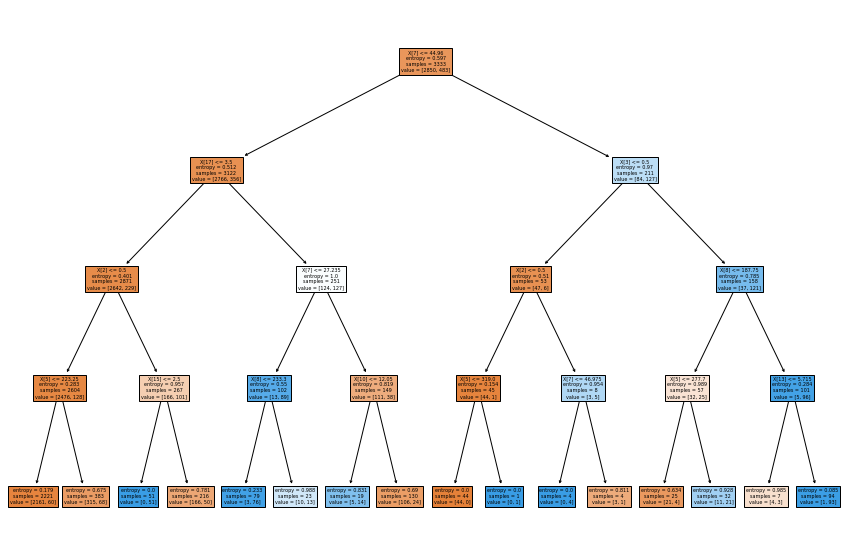

In [64]:
# Display tree
fig = plt.figure(figsize=(15,10))
graph = plot_tree(clf_tree, filled=True)

In [65]:
# Sitatuion 2 - Descision Boundry with underfit model (max Depth = 1)
clf_tree = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=23)

# Train the DT based on loaded data
clf_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=23)

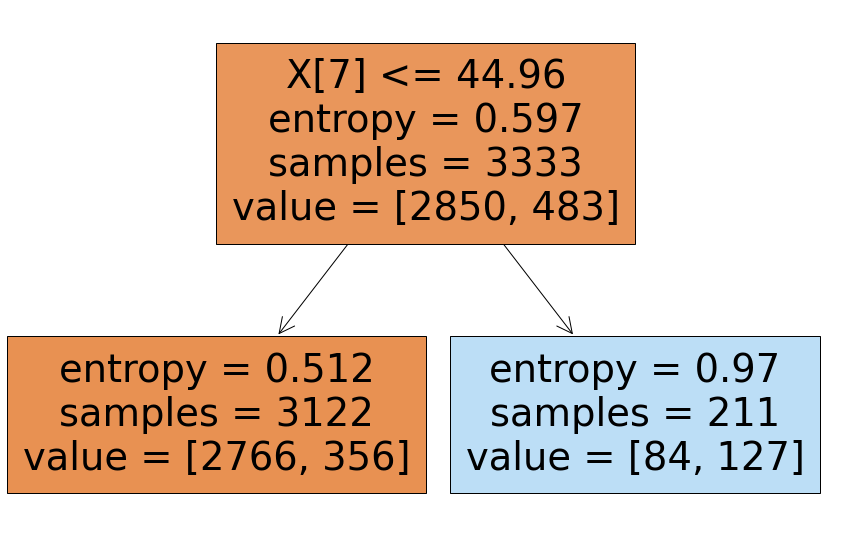

In [66]:
# Display tree
fig = plt.figure(figsize=(15,10))
graph = plot_tree(clf_tree, filled=True)

2. Decision tree classifier sklearn.tree.DecisionT reeClassif ier has parameter "max depth" which defines the maximum depth of the tree. What happens if we don't specify any value for this parameter? Paste the decision tree and the decision boundary you will obtain for this default case from Jupyter notebook output.

In [67]:
# default depth value
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=23)

# Train the DT based on loaded data
clf_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', random_state=23)

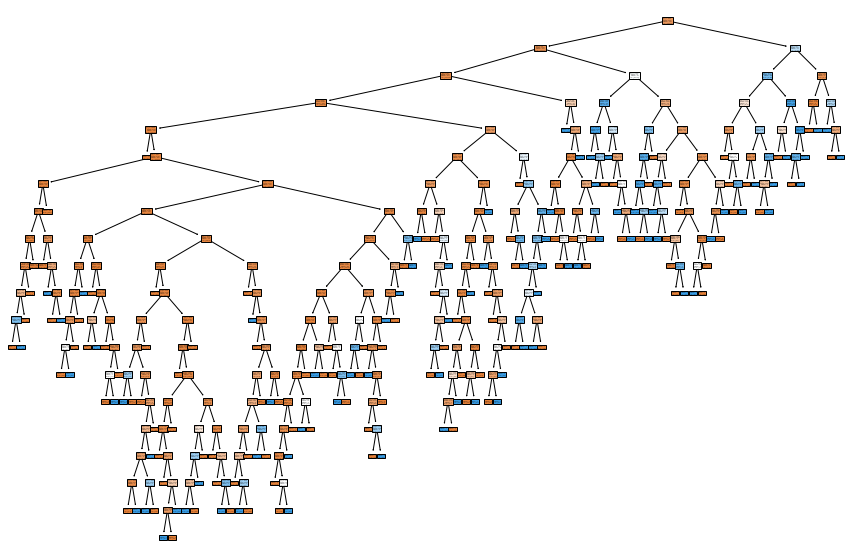

In [68]:
# Display tree
fig = plt.figure(figsize=(15,10))
graph = plot_tree(clf_tree, filled=True)

3. For Bank Dataset, what are the 5 different age values that the decision tree used to construct the splits of the tree? What is the significance of these 5 values?

In [72]:
Bank_Dataset = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})

In [73]:
from sklearn.tree import export_graphviz
from matplotlib import pyplot
import pydotplus

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)


age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(Bank_Dataset['Age'].values.reshape(-1, 1), Bank_Dataset['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='project1-DT2_2.png')


The 5 different age values that the decision tree used to construct the splits of the tree are: 43.5, 19, 22.5, 30, and 32 years. The significance of these values is that these are exactly the mean values between the ages at which the target class "switches" from 1 to 0 or 0 to 1

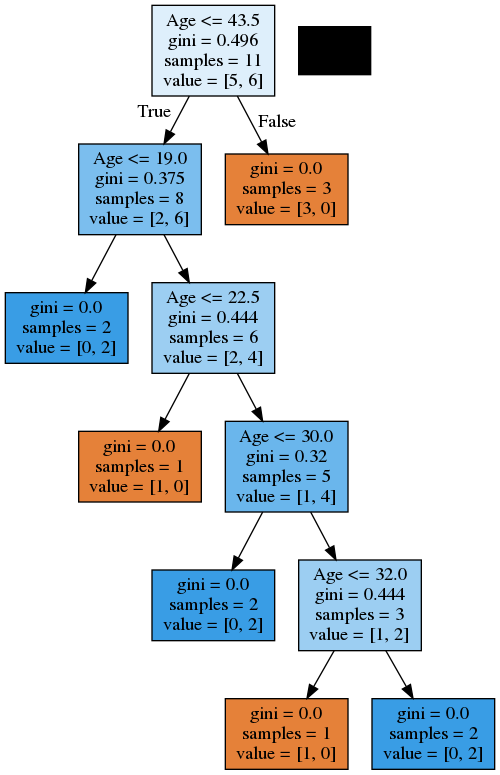

In [74]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "project1-DT2_2.png"
Image(filename = PATH , width=500, height=200)

4. For the customer churn prediction task, we show that the accuracy of the decision tree is 94% when max depth is set to 5. What happens to accuracy when we leave the value of max depth to its default value? Explain the rise/fall of accuracy.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#With max_depth = 5
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=23)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=23)

In [77]:
accuracy_score(y_test, clf.predict(X_test))

0.935

In [78]:
#With max_depth = default
clf = DecisionTreeClassifier(criterion='entropy', random_state=17)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [79]:
accuracy_score(y_test, clf.predict(X_test))

0.899

5. Given a dataset d, with n sample and m continuous features, what does Standard Scaler sklearn.preprocessing.StandardScaler do? Given dataset d = [[0, 0], [0, 0], [1, 1], [1, 1]], write down its scaler transformation.

In [80]:
from sklearn.preprocessing import StandardScaler
d = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
scaler.fit(d)

print("The scalar transformation is ")
scaler.transform(d)

The scalar transformation is 


array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

6. How many decision trees do we have to construct if we have to search the two-parameter space, max depth[1-10] and max features[4-18]? If we consider 10-fold cross-validation with the above scenario, how many decision trees do we construct in total?

In order to evaluate a 10-fold cross-validation of the described dataset with a max depth[1-10] and max features[4-18] and desired decision tree we would need 10x10x15 decision trees

7. For the customer churn prediction task, what is the best choice of k[1-10] in the k-nearest neighbor algorithm in the 10-fold cross-validation scenario?

In [90]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

numNeighbors = np.arange(1, 11) #test kNN classifcation by using a k range of 1-10
bestCrossScores = []

# Train a kNN model for each k value. Log the accuracy.
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    bestCrossScores.append(sum(scores)/len(scores))

In [91]:
numNeighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [92]:
bestCrossScores

[0.812684787792084,
 0.8718443930890283,
 0.8585598474010492,
 0.8761325703385788,
 0.8752668647518433,
 0.8778401379259749,
 0.878700341146693,
 0.876552584277906,
 0.8769817688272624,
 0.8769799347052567]

In [93]:
print("The best k for a 10-fold cross validation is {} with an accuracy of {:.2f}". format(bestCrossScores.index(max(bestCrossScores))+1, max(bestCrossScores)))
    

The best k for a 10-fold cross validation is 7 with an accuracy of 0.88


Text(0, 0.5, 'Accuracy')

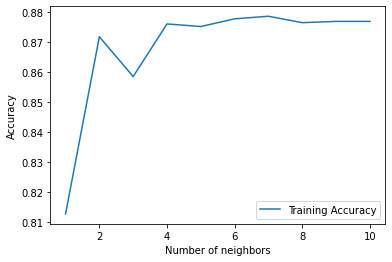

In [94]:
plt.plot(numNeighbors, bestCrossScores)
plt.legend(['Training Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

8. For MNIST dataset, what was the accuracy of the decision tree [max depth = 5] and K-nearest neighbor [K = 10]? What were the best hyper-parameter values and test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation?

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

In [ ]:
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
# Divide dataset for training/testing of both models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Decision Tree 
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
tree_pred = tree.predict(X_test)
print ("Decision tree accuracy is {:.2f}".format(accuracy_score(y_test, tree_pred)))

Decision tree accuracy is 0.76


In [ ]:
# kNN classification model
from sklearn.pipeline import Pipeline
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10))])
knn_pipe.fit(X_train, y_train);

In [ ]:
knn_pred = knn_pipe.predict(X_test)
print ("knn model accuracy is {:.2f}".format(accuracy_score(y_test, knn_pred)))

knn model accuracy is 0.97


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set of hyperparameter values

tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [ ]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 10, 'max_features': 20}, 0.8480680452792007)

In [ ]:
print("Test score:{:.2f}".format(accuracy_score(y_test,  tree_grid.best_estimator_.predict(X_test))))

Test score:0.86


## 3 Problem 3 [10 points]
The files for this problem are under Experiment 3 folder. Datasets to be used for experimentation: spam.csv. Jupyter notebook to be used as starting point: Naive Bayes Spam.ipynb. The dataset contains 5,574 messages tagged according to ham (legitimate) or spam. In this experiment we will learn about text features, how to convert them in matrix form, and apply the Naive Bayes algorithm. Answer the following questions: 
1. What is the distribution of the "label" class. Is it skewed? 


In [ ]:
df_spam = pd.read_csv('spam.csv')
df_spam.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
(df_spam['label'] == 'ham').sum()

4825

In [ ]:
(df_spam['label'] == 'spam').sum()

747

Yes, given the class imbalance, the class distribution is skewed

2. How many unique values of SMS are there in the dataset? What is the SMS that occurred most frequently and what is its frequency? 


In [ ]:
# no of unique values of SMS
len(df_spam['sms'].unique())

5169

In [ ]:
# SMS that occurred most frequently and its frequency
df_sms = df_spam['sms'].value_counts()

In [ ]:
df_sms = pd.DataFrame(df_sms)
df_sms = df_sms.reset_index()
df_sms.columns = ['sms', 'count']
df_sms

,sms,count
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4
...,...,...
5164,I gotta collect da car at 6 lei.,1
5165,No. On the way home. So if not for the long dr...,1
5166,Urgent! Please call 09061743811 from landline....,1
5167,Dear 0776xxxxxxx U've been invited to XCHAT. T...,1


In [ ]:
print("The most common sms is {} and its count is {}".format(df_sms['sms'][0],df_sms['count'][0]))

The most common sms is Sorry, I'll call later and its count is 30


3. What is the maximum and minimum length of SMS present in the dataset? 


In [ ]:
max_sms = max(df_sms['sms'].apply(len))
min_sms = min(df_sms['sms'].apply(len))
print("The max and min length of the unique SMS messages are {} and {}".format(max_sms, min_sms))

The max and min length of the unique SMS messages are 910 and 2


4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam SMS. What can you say about the difference in SMS lengths across the two labels after examining the plots?


In [ ]:
df_h = df_spam[df_spam['label'] == 'ham']
df_s= df_spam[df_spam['label'] == 'spam']
bin_size = 5

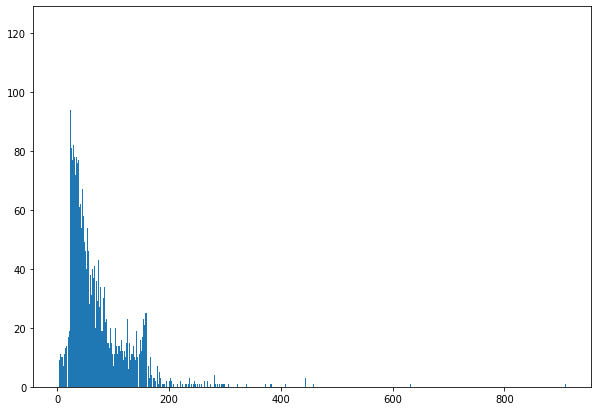

In [ ]:
# For ham sms Creating histogram
no_bins = len(df_h)//bin_size #length / bin size
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(np.asarray(df_h['sms'].apply(len)), bins = no_bins)
 
# Show plot
plt.show()

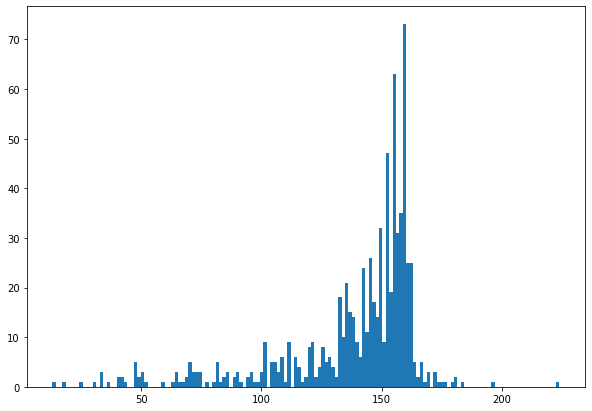

In [ ]:
# For spam sms Creating histogram
no_bins = len(df_s)//bin_size #length / bin size
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(np.asarray(df_s['sms'].apply(len)), bins = no_bins)
 
# Show plot
plt.show()

5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term matrix. 

In [ ]:
documents_orig = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?']

# setting all chars to lowercase and...
documents = [d.lower() for d in documents_orig]
# removing punctuation (IE: all ',' '?' '.' symbols)
for index in range(len(documents)):
    documents[index] = documents[index].replace('.', '')
    documents[index] = documents[index].replace('?', '')
    documents[index] = documents[index].replace(',', '')
    
print(documents)

['hi how are you', 'win money win from home call now', 'hi call you now or tomorrow']


In [ ]:
#tokenize words
list_of_words = []

for i in range(len(documents)):
    list_of_words.append(documents[i].split())

print(list_of_words)

[['hi', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home', 'call', 'now'], ['hi', 'call', 'you', 'now', 'or', 'tomorrow']]


In [ ]:
# Count of each word used in each sms msg.
from collections import Counter

freq_list = []

for d in list_of_words:
    freq_list.append(Counter(d))
    
print(freq_list)

[Counter({'hi': 1, 'how': 1, 'are': 1, 'you': 1}), Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1, 'call': 1, 'now': 1}), Counter({'hi': 1, 'call': 1, 'you': 1, 'now': 1, 'or': 1, 'tomorrow': 1})]


6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive Bayes algorithm.

In [ ]:
df_spam['label'] = df_spam['label'].replace('ham', 0)
df_spam['label'] = df_spam['label'].replace('spam', 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_spam['sms'], df_spam['label'],test_size=0.30)

In [ ]:
#Vectorizing the words 
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Transform train and test data
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [ ]:
# Implementing Bayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy : {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision : {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall : {:.2f}'.format(recall_score(y_test, predictions)))
print('F1 : {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy : 0.99
Precision : 0.97
Recall : 0.92
F1 : 0.94


In [ ]:
!jupyter nbconvert AmartyaDutta_proj1.ipynb

[NbConvertApp] WARNING | pattern 'AmartyaDutta_proj1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec

In [ ]:
!jupyter nbconvert  AmartyaDutta_proj1.ipynb --to html

[NbConvertApp] WARNING | pattern 'AmartyaDutta_proj1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec

In [ ]:
!jupyter nbconvert --to html AmartyaDutta_proj1.ipynb

[NbConvertApp] WARNING | pattern 'AmartyaDutta_proj1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec